In [20]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np

#### Read the dataset

In [21]:
data= pd.read_csv("child-all.csv")
data.head()

,1000_at,1001_at,1005_at,1007_s_at,1008_f_at,1009_at,100_g_at,1011_s_at,1012_at,1013_at,...,AFFX-HUMTFRR/M11507_5_at,AFFX-HUMTFRR/M11507_M_at,AFFX-LysX-3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-TrpnX-5_at,AFFX-YEL021w/URA3_at,AFFX-hum_alu_at,class
0,1073.4,313.2,2064.6,1943.4,3966.5,5012.3,695.8,1237.5,218.3,48.8,...,220.9,125.1,76.7,27.0,263.5,93.0,36.7,94.0,115768.4,after Th
1,745.5,108.8,406.3,721.1,1509.5,5942.7,578.3,537.0,317.5,34.3,...,235.4,115.6,176.3,1109.9,1202.0,22.6,11.3,53.0,109909.9,after Th
2,3383.0,581.0,799.1,2411.0,7352.2,39593.5,3356.6,769.2,468.8,117.2,...,125.0,1072.8,288.4,409.9,2393.6,1587.5,128.6,1274.2,639564.9,after Th
3,991.3,132.2,2372.2,1991.5,1355.1,4314.7,704.4,511.6,13.7,137.8,...,96.6,28.4,109.7,232.5,435.9,48.2,98.7,138.0,94332.1,after Th
4,920.3,531.1,1415.6,1417.1,3341.3,3451.2,443.3,565.9,354.7,157.2,...,216.4,84.6,148.7,432.5,1010.4,33.1,52.8,296.0,125442.6,after Th


In [22]:
print(len(data)) # total no of rows
print(len(data.columns)) # total number of columns

110
8281


In [23]:
data["class"].unique() # unique class values

array(['after Th', 'before Th'], dtype=object)

In [24]:
data = data.replace('?',np.nan) # replaces the 'None' string to null
data2 = data.drop('class', axis=1).astype(float)


In [25]:
data2.isna().values.any() # checking for missing data

True

## Trying Different Normalization Techniques

#### 1.The maximum absolute scaling

In [26]:
# The maximum absolute scaling :- rescaling each feature between -1 and 1 by dividing every observation by its maximum absolute value.
std1 = []
for colm in data2.columns:
    data2[colm] = data2[colm].replace(np.nan,data2[colm].mean()) # puts the mean value of the column in an empty cell
    data2[colm] = data2[colm]/data2[colm].abs().max()
    std1.append(data2[colm].std())

display(data2)

,1000_at,1001_at,1005_at,1007_s_at,1008_f_at,1009_at,100_g_at,1011_s_at,1012_at,1013_at,...,AFFX-HUMTFRR/M11507_3_at,AFFX-HUMTFRR/M11507_5_at,AFFX-HUMTFRR/M11507_M_at,AFFX-LysX-3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-TrpnX-5_at,AFFX-YEL021w/URA3_at,AFFX-hum_alu_at
0,0.136572,0.095508,0.043622,0.189417,0.030852,0.083947,0.127825,0.149927,0.080131,0.022154,...,0.021250,0.050851,0.039785,0.022876,0.002327,0.016233,0.026904,0.015861,0.020424,0.121762
1,0.094852,0.033178,0.008584,0.070283,0.011741,0.099529,0.106239,0.065059,0.116544,0.015571,...,0.058199,0.054188,0.036764,0.052581,0.095637,0.074048,0.006538,0.004884,0.011515,0.115600
2,0.430429,0.177172,0.016884,0.234993,0.057187,0.663117,0.616637,0.093191,0.172081,0.053205,...,0.205728,0.028775,0.341178,0.086015,0.035320,0.147455,0.459253,0.055577,0.276850,0.672677
3,0.126126,0.040313,0.050121,0.194105,0.010540,0.072263,0.129404,0.061982,0.005029,0.062557,...,0.011731,0.022237,0.009032,0.032718,0.020034,0.026853,0.013944,0.042655,0.029984,0.099216
4,0.117092,0.161955,0.029909,0.138120,0.025989,0.057801,0.081438,0.068561,0.130199,0.071364,...,0.038512,0.049815,0.026905,0.044350,0.037267,0.062244,0.009576,0.022819,0.064313,0.131937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.643710,0.796267,0.128367,0.072778,0.266520,0.493264,0.366921,0.468137,0.183460,0.883512,...,0.888186,0.898184,0.728279,0.044141,0.022447,0.149253,0.130616,0.438048,0.331385,0.750052
106,0.633900,1.000000,0.502164,0.913255,0.473329,0.236339,0.565933,0.498570,0.284146,0.611404,...,0.300228,0.651251,0.408027,0.527364,0.023360,0.252557,0.176585,1.000000,0.710179,0.657014
107,0.483752,0.020309,0.497291,0.102915,0.142439,1.000000,0.431697,0.704834,0.304188,0.366851,...,1.000000,1.000000,0.923642,0.140535,0.084022,0.203908,0.145399,0.036605,0.130951,0.411232
108,0.461817,0.144665,0.136986,0.411515,0.802777,0.106573,0.109858,0.073601,0.049848,0.038269,...,0.580609,0.408715,0.920907,0.033344,0.365979,0.253056,0.145283,0.376896,0.652341,0.675566


In [27]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,35205_at,40780_at,40546_s_at,36798_g_at,32748_at,33659_at,39094_at,353_at,36058_at,41858_at,class
0,0.150034,0.152030,0.134889,0.119979,0.169526,0.123251,0.146085,0.123064,0.149749,0.121429,after Th
1,0.119816,0.097508,0.131219,0.114041,0.159755,0.156637,0.130585,0.090572,0.123222,0.108837,after Th
2,0.436590,0.049333,0.864964,0.444511,0.953109,0.547431,0.547838,0.561875,0.712487,0.953922,after Th
3,0.151754,0.254077,0.161563,0.130693,0.140182,0.075291,0.076482,0.076596,0.142630,0.147515,after Th
4,0.134856,0.093775,0.121940,0.127041,0.131756,0.145975,0.067731,0.067799,0.173548,0.115685,after Th


C:\Users\shova\AppData\Local\Temp\ipykernel_6244\3147995716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(file.corr(), annot=True)


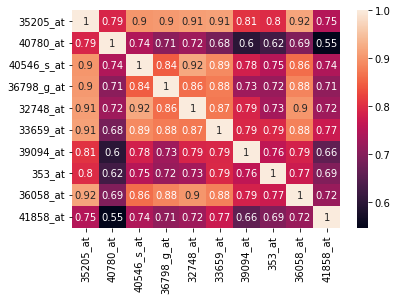

In [28]:
dataplot = sb.heatmap(file.corr(), annot=True)
mp.show()

#### 2.The min-max approach

In [29]:
data = data.replace('?',np.nan) # replaces the 'None' string to null
data2 = data.copy().drop("class",axis=1).astype(float)
std1 = []
for colm in data2.columns: #rescales the feature to a ? hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.
    data2[colm] = data2[colm].replace(np.nan,data2[colm].mean()) # puts the mean value of the column in an empty cell
    data2[colm] = (data2[colm]-data2[colm].min())/(data2[colm].max()-data2[colm].min())
    std1.append(data2[colm].std())

display(data2)

,1000_at,1001_at,1005_at,1007_s_at,1008_f_at,1009_at,100_g_at,1011_s_at,1012_at,1013_at,...,AFFX-HUMTFRR/M11507_3_at,AFFX-HUMTFRR/M11507_5_at,AFFX-HUMTFRR/M11507_M_at,AFFX-LysX-3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-TrpnX-5_at,AFFX-YEL021w/URA3_at,AFFX-hum_alu_at
0,0.101784,0.090739,0.042936,0.184625,0.024310,0.053041,0.118235,0.116821,0.075550,0.020508,...,0.016217,0.042630,0.035275,0.020334,0.001122,0.013199,0.021327,0.012917,0.014902,0.095249
1,0.058384,0.028080,0.007874,0.064787,0.005070,0.069149,0.096412,0.028648,0.112144,0.013915,...,0.053356,0.045997,0.032240,0.050117,0.094545,0.071192,0.000844,0.001907,0.005943,0.088901
2,0.407481,0.172833,0.016179,0.230470,0.050822,0.651751,0.612422,0.057876,0.167958,0.051612,...,0.201644,0.020363,0.338084,0.083637,0.034155,0.144826,0.456154,0.052752,0.272773,0.662795
3,0.090918,0.035253,0.049440,0.189341,0.003861,0.040963,0.119832,0.025451,0.000074,0.060979,...,0.006649,0.013769,0.004377,0.030202,0.018850,0.023852,0.008292,0.039792,0.024515,0.072022
4,0.081520,0.157537,0.029214,0.133025,0.019414,0.026013,0.071338,0.032286,0.125867,0.069801,...,0.033568,0.041585,0.022334,0.041864,0.036105,0.059353,0.003899,0.019896,0.059038,0.105731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.629355,0.795193,0.127743,0.067297,0.261569,0.476168,0.359961,0.447423,0.179394,0.883316,...,0.887611,0.897302,0.727003,0.041654,0.021266,0.146630,0.125633,0.436368,0.327616,0.742507
106,0.619150,1.000000,0.501807,0.912742,0.469774,0.210575,0.561160,0.479042,0.280581,0.610750,...,0.296629,0.648231,0.405247,0.526135,0.022180,0.250252,0.171865,1.000000,0.708545,0.646660
107,0.462953,0.015144,0.496931,0.097612,0.136650,1.000000,0.425449,0.693339,0.300723,0.365786,...,1.000000,1.000000,0.923283,0.138299,0.082916,0.201453,0.140500,0.033723,0.126052,0.393458
108,0.440134,0.140155,0.136367,0.408036,0.801446,0.076431,0.100071,0.037522,0.045116,0.036651,...,0.578452,0.403594,0.920536,0.030829,0.365214,0.250752,0.140384,0.375033,0.650381,0.665772


In [30]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,35205_at,32748_at,40890_at,36058_at,37386_i_at,34302_at,33659_at,35745_f_at,40546_s_at,31385_at,class
0,0.079467,0.085936,0.039048,0.073720,0.069694,0.098938,0.051865,0.063080,0.079254,0.106748,after Th
1,0.046740,0.075181,0.041825,0.044820,0.036070,0.061112,0.087969,0.068655,0.075347,0.064491,after Th
2,0.389814,0.948389,0.758874,0.686777,0.258215,0.624203,0.510582,0.601650,0.856280,0.985894,after Th
3,0.081329,0.053639,0.038849,0.065964,0.056180,0.120882,0.000000,0.059365,0.107644,0.064223,after Th
4,0.063029,0.044365,0.043338,0.099646,0.090214,0.063902,0.076439,0.028269,0.065472,0.041573,after Th


C:\Users\shova\AppData\Local\Temp\ipykernel_6244\3147995716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(file.corr(), annot=True)


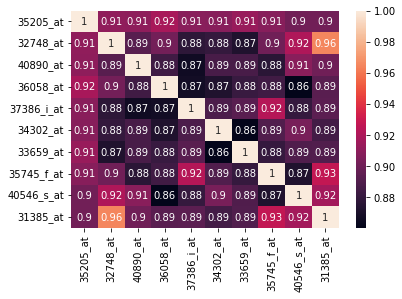

In [31]:
dataplot = sb.heatmap(file.corr(), annot=True)
mp.show()

#### 3.Z score normalization

In [32]:
data = data.replace('?',np.nan) # replaces the 'None' string to null
data2 = data.copy().drop("class",axis=1).astype(float)
std1 = []
for colm in data2.columns:
    data2[colm] = data2[colm].replace(np.nan,data2[colm].mean()) # puts the mean value of the column in an empty cell
    data2[colm] = (data2[colm] - data2[colm].mean())/(data2[colm].std())
    std1.append(data2[colm].std())
display(data2)

,1000_at,1001_at,1005_at,1007_s_at,1008_f_at,1009_at,100_g_at,1011_s_at,1012_at,1013_at,...,AFFX-HUMTFRR/M11507_3_at,AFFX-HUMTFRR/M11507_5_at,AFFX-HUMTFRR/M11507_M_at,AFFX-LysX-3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-TrpnX-5_at,AFFX-YEL021w/URA3_at,AFFX-hum_alu_at
0,-0.772729,-0.524127,-0.627133,-0.379090,-0.565037,-0.684949,-0.566454,-0.670236,-0.526886,-0.589865,...,-0.806707,-0.684915,-0.697937,-0.580285,-0.553879,-0.602552,-0.594877,-0.660909,-0.742860,-0.862536
1,-0.938628,-0.808971,-0.776390,-0.884536,-0.669587,-0.602323,-0.660540,-0.990001,-0.339026,-0.626491,...,-0.607016,-0.668781,-0.711255,-0.431166,0.244788,-0.260113,-0.723198,-0.729259,-0.790186,-0.883995
2,0.395798,-0.150931,-0.741036,-0.185727,-0.420968,2.386109,1.564133,-0.884006,-0.052502,-0.417087,...,0.190312,-0.791619,0.630629,-0.263333,-0.271480,0.174676,2.129219,-0.413613,0.619435,1.056059
3,-0.814267,-0.776362,-0.599447,-0.359199,-0.676157,-0.746901,-0.559568,-1.001596,-0.914347,-0.365051,...,-0.858153,-0.823219,-0.833499,-0.530878,-0.402317,-0.539647,-0.676536,-0.494072,-0.692071,-0.941054
4,-0.850189,-0.220469,-0.685547,-0.596726,-0.591640,-0.823586,-0.768639,-0.976809,-0.268578,-0.316047,...,-0.713414,-0.689922,-0.754714,-0.472488,-0.254812,-0.330024,-0.704059,-0.617585,-0.509693,-0.827101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1.243911,2.678282,-0.266118,-0.873950,0.724237,1.485462,0.475698,0.528710,0.006205,4.202949,...,3.878681,3.410686,2.337003,-0.473536,-0.381666,0.185330,0.058578,1.967859,0.909162,1.325525
106,1.204902,3.609321,1.326245,2.691921,1.855629,0.123116,1.343131,0.643378,0.525660,2.688870,...,0.701037,2.217132,0.925305,1.952181,-0.373849,0.797195,0.348213,5.466874,2.921555,1.001513
107,0.607839,-0.867779,1.305489,-0.746089,0.045424,4.172438,0.758036,1.420536,0.629059,1.328120,...,4.482986,3.902817,3.198181,0.010350,0.145370,0.509050,0.151720,-0.531745,-0.155672,0.145561
108,0.520614,-0.299484,-0.229405,0.563200,3.657945,-0.564971,-0.644766,-0.957819,-0.683120,-0.500192,...,2.216369,1.044831,3.186125,-0.527734,2.558702,0.800150,0.150991,1.587093,2.614282,1.066123


In [33]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,1402_at,1017_at,class
0,-0.658809,-0.830148,after Th
1,-0.371679,-0.719474,after Th
2,-0.792420,0.090027,after Th
3,-0.372788,-0.689118,after Th
4,-0.570474,-0.776708,after Th
